In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer , WordNetLemmatizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical



In [2]:
df_train = pd.read_csv('../Datasets/Emotion Data Set For NLP/train.txt',sep=';',names=['text','emotion'])
df_val = pd.read_csv('../Datasets/Emotion Data Set For NLP/val.txt',sep=';',names=['text','emotion'])
df_test = pd.read_csv('../Datasets/Emotion Data Set For NLP/test.txt',sep=';',names=['text','emotion'])


In [3]:
df_train.head(5)

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_train.shape

(16000, 2)

# EDA

In [5]:
#train Dataset

df_train.emotion.value_counts()

emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [6]:
#Balanced Dataset Check 
df_train.emotion.value_counts() / df_train.shape[0] * 100


emotion
joy         33.51250
sadness     29.16250
anger       13.49375
fear        12.10625
love         8.15000
surprise     3.57500
Name: count, dtype: float64

C:\Users\monk\AppData\Local\Temp\ipykernel_2772\2186075834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion',data=df_train,palette='Set2')


<Axes: xlabel='emotion', ylabel='count'>

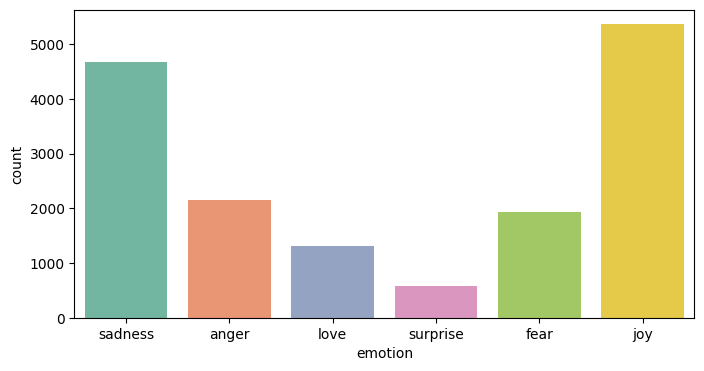

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='emotion',data=df_train,palette='Set2')

In [8]:

df_train.isnull().sum() #check for null values


text       0
emotion    0
dtype: int64

In [9]:
df_train.duplicated().sum() #check for duplicate values


np.int64(1)

In [10]:
index = df_train[df_train.duplicated() == True].index
print(index) #index of duplicated values

Index([13846], dtype='int64')


In [11]:
df_train.drop(index,axis=0,inplace=True)
df_train.reset_index(drop=True,inplace=True)



In [12]:
df_train[df_train['text'].duplicated()==True]

,text,emotion
5067,i feel on the verge of tears from weariness i ...,joy
6133,i still feel a craving for sweet food,love
6563,i tend to stop breathing when i m feeling stre...,anger
7623,i was intensely conscious of how much cash i h...,sadness
7685,im still not sure why reilly feels the need to...,surprise
8246,i am not amazing or great at photography but i...,love
9596,ive also made it with both sugar measurements ...,joy
9687,i had to choose the sleek and smoother feel of...,joy
9769,i often find myself feeling assaulted by a mul...,sadness
9786,i feel im being generous with that statement,joy


In [13]:
df_train[df_train['text'] == df_train.iloc[7623]['text']]

,text,emotion
1625,i was intensely conscious of how much cash i h...,anger
7623,i was intensely conscious of how much cash i h...,sadness


In [14]:
index = df_train[df_train['text'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [15]:
temp = df_train.copy()

In [16]:
#Count the number of stopwords in the data
temp =df_train.copy()
stop_words = set(stopwords.words('english'))
temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
5     1416
7     1405
6     1392
4     1341
8     1319
3     1263
9     1177
10    1048
2      922
11     889
12     752
13     644
14     493
1      450
15     376
16     265
17     238
18     164
19     113
20      90
0       79
21      60
22      33
23      19
24       7
25       6
26       6
28       1
29       1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

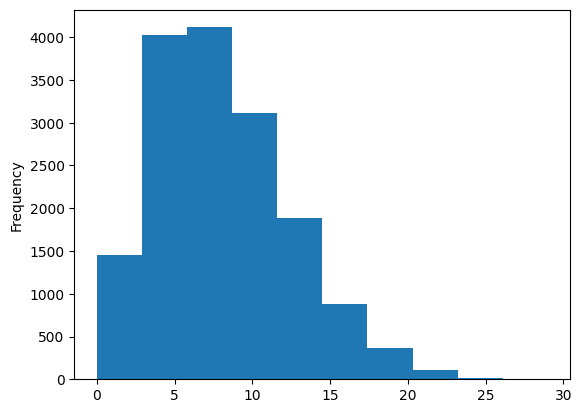

In [17]:
 temp['stop_words'].plot(kind='hist')

In [18]:
df_test.emotion.value_counts()

emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64

In [19]:
index = df_test[df_test['text'].duplicated() == True].index
df_test.drop(index,axis=0,inplace=True)
df_test.reset_index(drop=True,inplace=True)
df_test

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unki...,anger
1996,im feeling a little cranky negative after this...,anger
1997,i feel that i am useful to my people and that ...,joy
1998,im feeling more comfortable with derby i feel ...,joy


In [20]:
temp = df_test.copy()
stop_words = set(stopwords.words('english'))
temp['stop_words'] = temp['text'].apply(lambda x:len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()

stop_words
7     184
6     179
3     175
5     175
4     163
9     163
8     139
10    123
2     118
11    115
12     84
13     71
15     61
14     58
1      42
16     40
17     31
18     22
20     17
19     11
21     10
0       8
23      7
24      2
22      2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

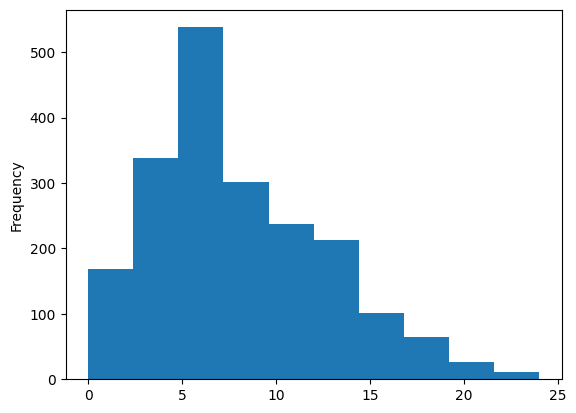

In [21]:
temp['stop_words'].plot(kind='hist')


C:\Users\monk\AppData\Local\Temp\ipykernel_2772\999359571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion',data=df_test,palette='Set2')


<Axes: xlabel='emotion', ylabel='count'>

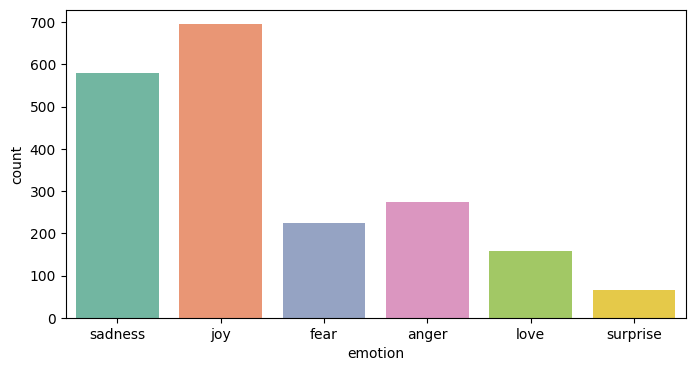

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(x='emotion',data=df_test,palette='Set2')

In [23]:
df_val.isnull().sum()

text       0
emotion    0
dtype: int64

In [24]:
df_val.duplicated().sum()

np.int64(0)

In [25]:
df_val[df_val['text'].duplicated() == True]

,text,emotion
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [26]:
index = df_val[df_val['text'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [27]:
temp =df_val.copy()
temp['stop_words'] = temp['text'].apply(lambda x: len(set(x.split()) & set(stop_words)))
temp.stop_words.value_counts()[:10] #show first 10 rows

stop_words
7     190
5     175
8     173
3     160
6     160
10    150
9     146
4     145
2     133
11    103
Name: count, dtype: int64

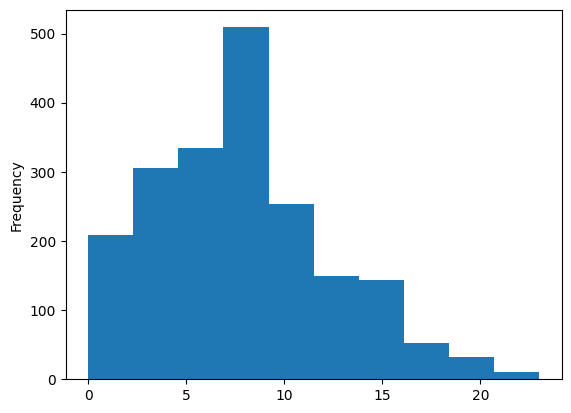

In [28]:

temp['stop_words'].plot(kind= 'hist');

# Data Prep

In [29]:
#Data Prepprocessing functions

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(text)

def remove_stop_words(text):
    text = [i for i in str(text).split() if i not in stop_words]
    return " ".join(text)

def remove_numbers(text):
    text = "".join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):
    text = text.split()

    text = [i.lower() for i in text]
    return " ".join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.text=df.text.apply(lambda text : lower_case(text))
    df.text=df.text.apply(lambda text : remove_stop_words(text))
    df.text=df.text.apply(lambda text : remove_numbers(text))
    df.text=df.text.apply(lambda text : Removing_punctuations(text))
    df.text=df.text.apply(lambda text : Removing_urls(text))
    df.text=df.text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= remove_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence


In [30]:
normalized_sentence("My Name is Rythm. @Tweets,  plays 2025  INDIA_")

'name rythm tweet play india'

In [31]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

# Modeling

### TF-IDF
The word counts suffer some issues: most frequent words are usually not important (like stop words), while they take high focus/count.

TFIDF (Term Frequency - Inverse Document) is a way to adjust those counts:

TF: #mentions within a document

IDF: #mentions across all docs 

So it gives higher importance to rare words across all docs (IDF++, TFIDF--), while it emphasyses on words appearing mostly in THIS doc (TF++, TFIDF--).

If a word appearing only in the current doc/sentence, it has TFIDF=1. If a word appears in all docs/sents but not the current one, it has TFIDF=0. If a word (stop word for example) appearing a lot in the current doc/sent and also in ALL others, it will have high TF (count) and much higher IDF (discount), so low TFIDF overall.

In [32]:
X_train = df_train['text'].values
Y_train = df_train['emotion'].values

In [33]:
X_train = df_train['text'].values
y_train = df_train['emotion'].values

X_test = df_test['text'].values
y_test = df_test['emotion'].values

X_val = df_val['text'].values
y_val = df_val['emotion'].values

In [34]:
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
def train_model(model,data,targets):
    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', model)])
    text_clf.fit(data,targets)
    return text_clf

In [36]:
def get_f1_score(train_model,X,y):
    predicted = train_model.predict(X)
    f1 = f1_score(y,predicted,average=None)
    return f1

In [37]:
log_reg = train_model(LogisticRegression(solver='liblinear',random_state=0),X_train,y_train)


In [38]:
y_pred = log_reg.predict(X_test)

log_reg_accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",log_reg_accuracy,'\n')
f1_Score = get_f1_score(log_reg,X_test,y_test)
pd.DataFrame(f1_score,columns=['f1_score'],index=df_train.emotion.unique())

Accuracy:  0.8685 



,f1_score
sadness,<function f1_score at 0x000002BA320E0DC0>
anger,<function f1_score at 0x000002BA320E0DC0>
love,<function f1_score at 0x000002BA320E0DC0>
surprise,<function f1_score at 0x000002BA320E0DC0>
fear,<function f1_score at 0x000002BA320E0DC0>
joy,<function f1_score at 0x000002BA320E0DC0>


In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       275
        fear       0.88      0.77      0.82       224
         joy       0.83      0.96      0.89       695
        love       0.86      0.60      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.94      0.47      0.63        66

    accuracy                           0.87      2000
   macro avg       0.88      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000



In [41]:
SVM = train_model(SVC(random_state = 0), X_train, y_train)


y_pred=SVM.predict(X_test)


SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')


f1 = get_f1_score(SVM,X_test,y_test)
pd.DataFrame(f1, index=df_train.emotion.unique(), columns=['F1 score']) 

Accuracy:  0.8675 



,F1 score
sadness,0.857685
anger,0.827907
love,0.893645
surprise,0.681648
fear,0.914821
joy,0.654206


In [42]:
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

#calculate the F1 score
f1_Score = get_f1_score(DT,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.emotion.unique(), columns=['F1 score']) 

Accuracy:  0.862 



,F1 score
sadness,0.856115
anger,0.815789
love,0.894737
surprise,0.753799
fear,0.903896
joy,0.617647


In [43]:
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
f1_Score = get_f1_score(RF, X_test, y_test)
pd.DataFrame(f1_Score, index=df_train.emotion.unique(), columns=['F1 score'])

Accuracy:  0.8835 



,F1 score
sadness,0.888483
anger,0.869565
love,0.903497
surprise,0.732673
fear,0.929701
joy,0.622951


In [44]:
# Create the DataFrame
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [
        round(log_reg_accuracy, 2),
        round(DT_accuracy, 2),
        round(SVM_accuracy, 2),
        round(RF_accuracy, 2)
    ]
})

# Sort by Accuracy in descending order
models_sorted = models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(models_sorted)


                    Model  Accuracy
0           Random Forest      0.88
1     Logistic Regression      0.87
2  Support Vector Machine      0.87
3           Decision Tree      0.86


In [45]:
#Splitting the text from the labels
X_train = df_train['text']
y_train = df_train['emotion']

X_test = df_test['text']
y_test = df_test['emotion']

X_val = df_val['text']
y_val = df_val['emotion']

In [46]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)



In [47]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [48]:
print(y_train)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [49]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train,X_test],axis=0))


In [50]:
tokenizer.word_index

{'UNK': 1,
 'feel': 2,
 'feeling': 3,
 'like': 4,
 'im': 5,
 'time': 6,
 'really': 7,
 'know': 8,
 'get': 9,
 'make': 10,
 'little': 11,
 'people': 12,
 'day': 13,
 'want': 14,
 'thing': 15,
 'one': 16,
 'would': 17,
 'life': 18,
 'think': 19,
 'still': 20,
 'ive': 21,
 'even': 22,
 'way': 23,
 'bit': 24,
 'something': 25,
 'love': 26,
 'going': 27,
 'much': 28,
 'dont': 29,
 'could': 30,
 'go': 31,
 'need': 32,
 'back': 33,
 'good': 34,
 'pretty': 35,
 'always': 36,
 'say': 37,
 'see': 38,
 'right': 39,
 'work': 40,
 'also': 41,
 'today': 42,
 'friend': 43,
 'year': 44,
 'around': 45,
 'made': 46,
 'cant': 47,
 'though': 48,
 'help': 49,
 'got': 50,
 'well': 51,
 'come': 52,
 'didnt': 53,
 'lot': 54,
 'felt': 55,
 'someone': 56,
 'never': 57,
 'thought': 58,
 'look': 59,
 'every': 60,
 'week': 61,
 'happy': 62,
 'less': 63,
 'many': 64,
 'sure': 65,
 'enough': 66,
 'quite': 67,
 'find': 68,
 'away': 69,
 'take': 70,
 'anything': 71,
 'home': 72,
 'kind': 73,
 'ever': 74,
 'person': 75

In [51]:
tokenizer.word_counts

OrderedDict([('didnt', 304),
             ('feel', 12920),
             ('humiliated', 59),
             ('go', 492),
             ('feeling', 6139),
             ('hopeless', 68),
             ('damned', 4),
             ('hopeful', 67),
             ('around', 347),
             ('someone', 295),
             ('care', 132),
             ('awake', 21),
             ('im', 2736),
             ('grabbing', 6),
             ('minute', 71),
             ('post', 146),
             ('greedy', 75),
             ('wrong', 85),
             ('ever', 247),
             ('nostalgic', 55),
             ('fireplace', 3),
             ('know', 977),
             ('still', 660),
             ('property', 4),
             ('grouchy', 29),
             ('ive', 659),
             ('little', 831),
             ('burdened', 67),
             ('lately', 107),
             ('wasnt', 107),
             ('sure', 270),
             ('taking', 102),
             ('milligram', 1),
             ('time', 1090),


In [52]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [53]:
max_len = max([len(x) for x in df_train['text'].values])
max_len

229

In [54]:
from tensorflow.keras.preprocessing.sequence import  pad_sequences

In [55]:
X_train = pad_sequences(sequences_train,maxlen=229,padding='pre')
X_test = pad_sequences(sequences_test,maxlen=229,padding='pre')
X_val = pad_sequences(sequences_val,maxlen=229,padding='pre')

In [56]:
sequences_train[0]

[53, 2, 531]

In [57]:
#after
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [58]:
vocabSize = len(tokenizer.word_index) + 1
vocabSize

14332

In [59]:
path_to_glove_file = 'C:/Users/monk/Desktop/Personal_Projects/DS Commons/Glove File/glove.6B.200d.txt'
embeddings_index = {}
num_tokens = vocabSize
embedding_dim = 200
hits = 0
misses = 0


In [60]:
with open(path_to_glove_file,encoding="utf-8") as f:
    for line in f:
        words , coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs,'f',sep=" ")
        embeddings_index[words] = coefs

print("Found %s word vectors" % len(embeddings_index))



Found 400000 word vectors


In [61]:
embeddings_matrix = np.zeros((num_tokens,embedding_dim))
for word , i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1

print("Converted %d words (%d misses)" % (hits,misses))

Converted 13249 words (1082 misses)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import  EarlyStopping


In [63]:
adam = Adam(learning_rate=0.005)
model = Sequential()
model.add(Embedding(input_dim=vocabSize,output_dim=200,input_length= X_train.shape[1],weights=[embeddings_matrix],trainable=False))
model.add(Bidirectional(LSTM(256,return_sequences=True,dropout=0.2,recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(128,return_sequences=True,dropout=0.2,recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()



c:\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,866,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,866,400 (10.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,866,400 (10.93 MB)

In [64]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [65]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=32,
                    epochs=6,
                    callbacks=[callback]  
                   )

Epoch 1/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 7993s 16s/step - accuracy: 0.4729 - loss: 1.3488 - val_accuracy: 0.8213 - val_loss: 0.4909
Epoch 2/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 5960s 12s/step - accuracy: 0.8653 - loss: 0.3783 - val_accuracy: 0.9264 - val_loss: 0.1816
Epoch 3/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 6512s 13s/step - accuracy: 0.9295 - loss: 0.1663 - val_accuracy: 0.9384 - val_loss: 0.1206
Epoch 4/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 4898s 10s/step - accuracy: 0.9434 - loss: 0.1194 - val_accuracy: 0.9254 - val_loss: 0.1685
Epoch 5/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 3545s 7s/step - accuracy: 0.9340 - loss: 0.1599 - val_accuracy: 0.9319 - val_loss: 0.1335
Epoch 6/6
500/500 ━━━━━━━━━━━━━━━━━━━━ 4126s 8s/step - accuracy: 0.9492 - loss: 0.1017 - val_accuracy: 0.9349 - val_loss: 0.1361


In [69]:
model.save("emotion_classifier.keras")